<h3> Lending club Case study </h3>

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sketch 
import seaborn as sns

df = pd.read_csv('loan.csv')

# dropping columns with complete null values
df.dropna(axis=1, how='all', inplace=True)

# Drop columns where all values are zeros
df = df.loc[:, (df != 0).any(axis=0)]

df['application_type'].value_counts()
# drop application_type column as it has no significance
df.drop('application_type',axis=1,inplace=True)
df['pymnt_plan'].value_counts()
# drop pymnt_plan column as it has no significance - it has only value n
df.drop('pymnt_plan',axis=1,inplace=True)
df.drop('url',axis=1,inplace=True)
df.drop('desc',axis=1,inplace=True)
# dropping columns with less significance and 
df.drop('title',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)
df.drop('tax_liens',axis=1,inplace=True)
df.drop('policy_code',axis=1,inplace=True)
df.drop('chargeoff_within_12_mths',axis=1,inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13240\3115576947.py:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


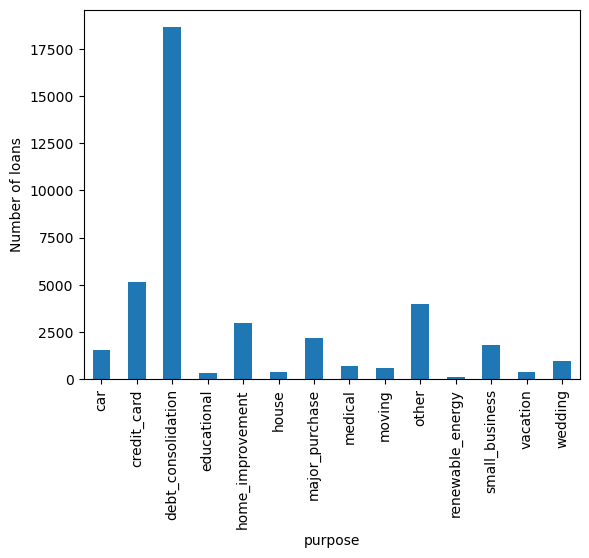

In [432]:
#univariate analysis 
loan_purpose = df.groupby('purpose')['member_id'].count()
loan_purpose.plot(kind='bar')

plt.xticks(rotation=90)
plt.ylabel('Number of loans')
plt.show()

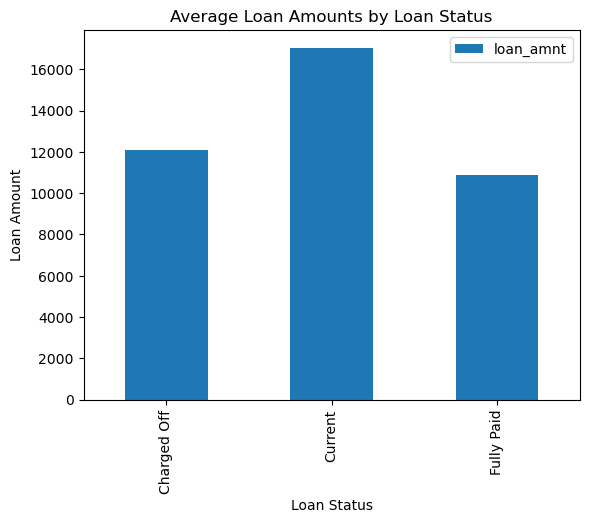

In [433]:

pivot_table1 = df.pivot_table(values='loan_amnt', index='loan_status',  aggfunc='mean')
pivot_table1.plot(kind='bar')
plt.title('Average Loan Amounts by Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()



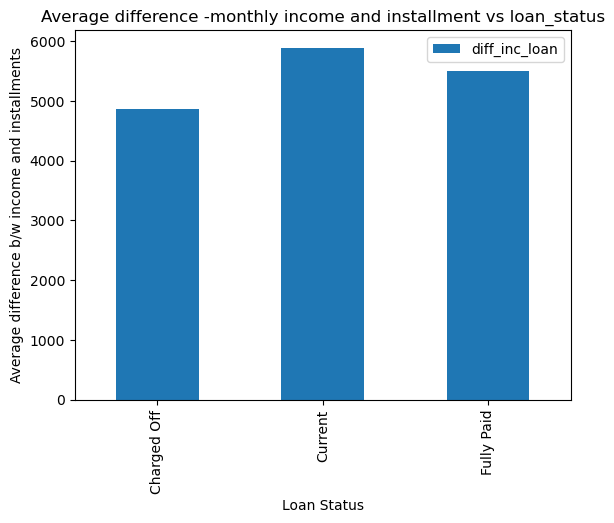

In [434]:

# Probability default based on monthly income vs monthly installments for loan
df['diff_inc_loan']=(df['annual_inc']/12)-df['installment']
pivot_instalmnt_status = df.pivot_table(values='diff_inc_loan', index='loan_status',  aggfunc='mean')
pivot_instalmnt_status.plot(kind='bar')
plt.title('Average difference -monthly income and installment vs loan_status')
plt.ylabel('Average difference b/w income and installments')
plt.xlabel('Loan Status')
plt.show()

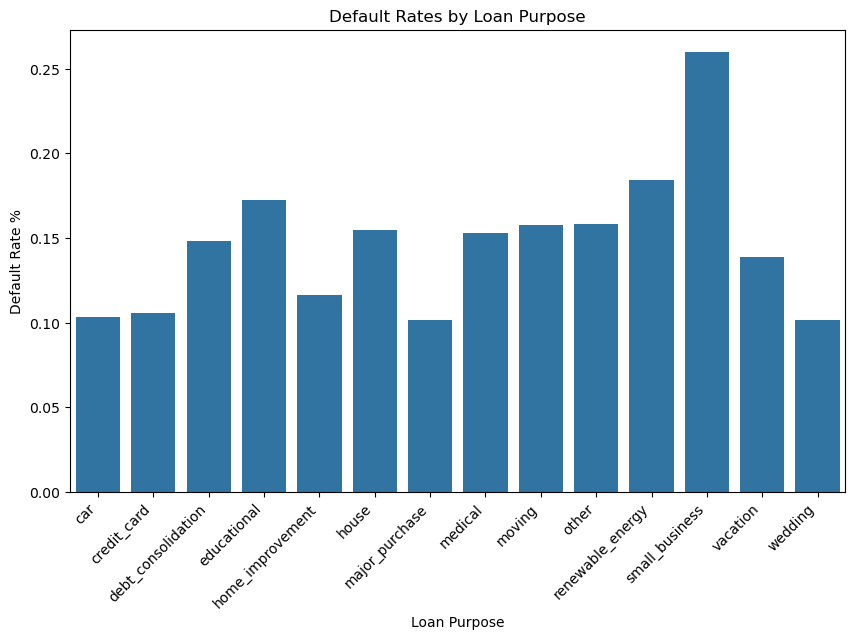

In [435]:
# purpose of loan vs defauls
default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()).reset_index(name='default_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default_rate', data=default_rates)
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate %')
plt.xticks(rotation=45, ha='right')
plt.show()

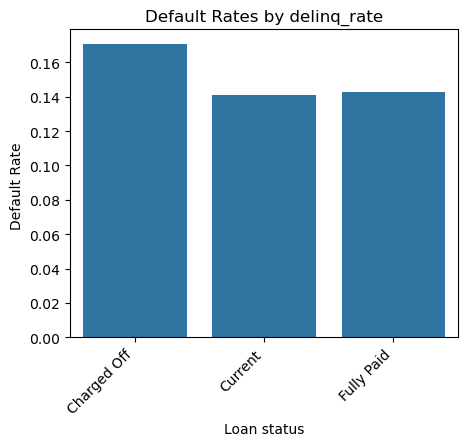

In [436]:
# delinq_2yrs based analysis , if there are more number of deferred payments, more chances of defaults
delinq_data = df.groupby('loan_status')['delinq_2yrs'].mean().reset_index(name='default_rate')
plt.figure(figsize=(5, 4))
sns.barplot(x='loan_status', y='default_rate', data=delinq_data)
plt.title('Default Rates by delinq_rate')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()

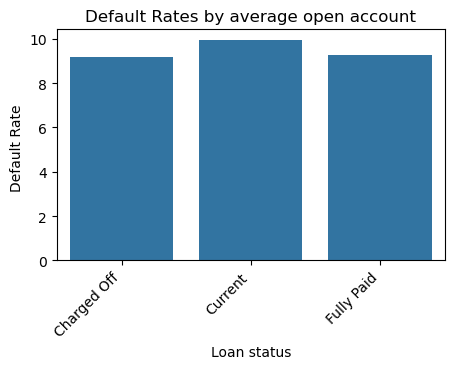

In [437]:
# open account based analysis , if there are more number of open accounts, more chances of defaults
open_acc_data = df.groupby('loan_status')['open_acc'].mean().reset_index(name='open_acc_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='open_acc_avg', data=open_acc_data)
plt.title('Default Rates by average open account')
plt.xlabel('Loan status')
plt.ylabel('Default Rate ')
plt.xticks(rotation=45, ha='right')
plt.show()


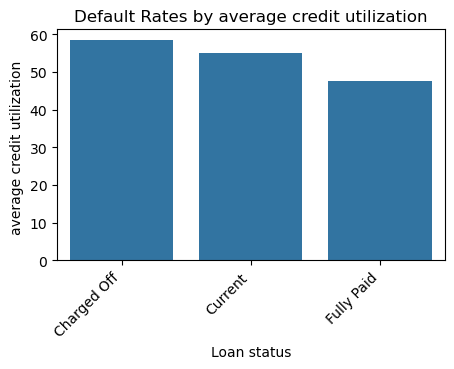

   loan_status  revol_util_avg
0  Charged Off           58.40
1      Current           54.95
2   Fully Paid           47.60


In [438]:
# Analysis based on revolving credit utilization
# clean thedata- convert the object to floating point by removing %
def Convert_percent_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%'))

df['revol_util'] = df['revol_util'].apply(Convert_percent_to_float)

revol_util_data = df.groupby('loan_status')['revol_util'].median().reset_index(name='revol_util_avg')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='revol_util_avg', data=revol_util_data)
plt.title('Default Rates by average credit utilization')
plt.xlabel('Loan status')
plt.ylabel('average credit utilization ')
plt.xticks(rotation=45, ha='right')
plt.show()
print(revol_util_data)



<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


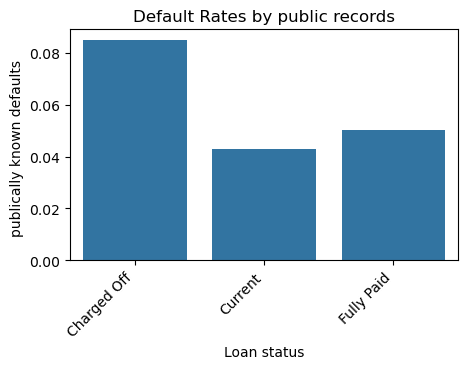

In [439]:
# Analysis of public data

df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'].info()

df['pub_rec'].describe()

pub_rec_data = df.groupby('loan_status')['pub_rec'].mean().reset_index(name='pub_data')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='pub_data', data=pub_rec_data)
plt.title('Default Rates by public records')
plt.xlabel('Loan status')
plt.ylabel('publically known defaults ')
plt.xticks(rotation=45, ha='right')
plt.show()



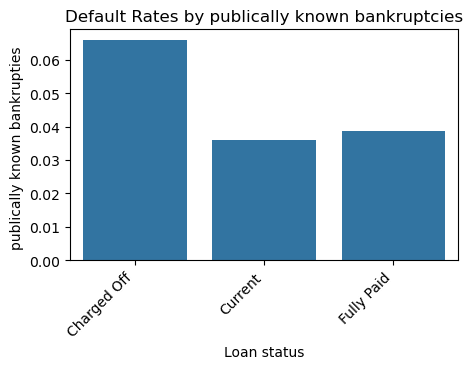

In [440]:
pub_bankrupt_data = df.groupby('loan_status')['pub_rec_bankruptcies'].mean().reset_index(name='pub_rec_bankrupt')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='pub_rec_bankrupt', data=pub_bankrupt_data)
plt.title('Default Rates by publically known bankruptcies')
plt.xlabel('Loan status')
plt.ylabel('publically known bankrupties ')
plt.xticks(rotation=45, ha='right')
plt.show()

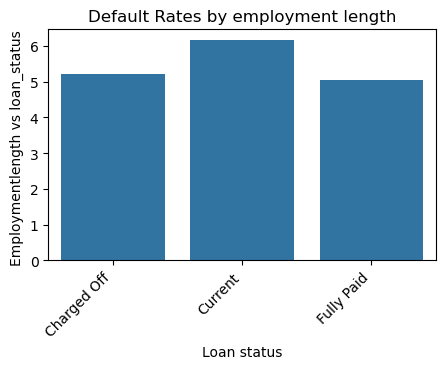

In [441]:
df['emp_length'] = df['emp_length'].str.replace(r'\+|\s*years?', '', regex=True).str.replace(r'<', '', regex=True)
exp_median=0
df['emp_length'].fillna(exp_median)
df['emp_length'] = df['emp_length'].astype(float)
emp_length_data = df.groupby('loan_status')['emp_length'].mean().reset_index(name='employment_length')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='employment_length', data=emp_length_data)
plt.title('Default Rates by employment length')
plt.xlabel('Loan status')
plt.ylabel('Employmentlength vs loan_status ')
plt.xticks(rotation=45, ha='right')
plt.show()



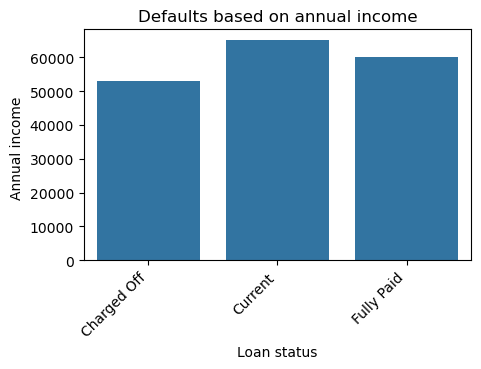

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [442]:
# annual income vs charged off


annual_income_data = df.groupby('loan_status')['annual_inc'].median().reset_index(name='avg_income')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='avg_income', data=annual_income_data)
plt.title('Defaults based on annual income')
plt.xlabel('Loan status')
plt.ylabel('Annual income ')
plt.xticks(rotation=45, ha='right')
plt.show()
df['annual_inc'].describe()

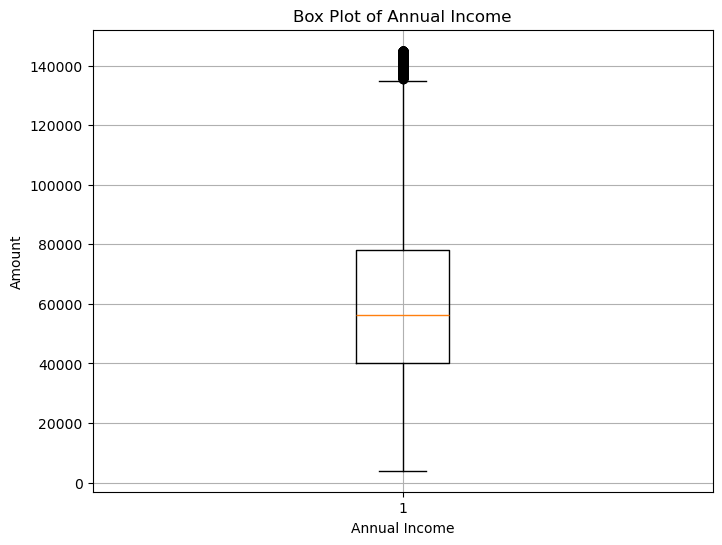

In [443]:
# Calculate Q1, Q3, and IQR
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Drop outliers from the DataFrame
df_no_outliers = df[~((df['annual_inc'] < lower_bound) | (df['annual_inc'] > upper_bound))]

# Assuming you have your data in a pandas DataFrame named 'df' and the column is 'annual_inc'

# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.boxplot(df_no_outliers['annual_inc'], vert=True)  # Create a vertical boxplot

# Customize the plot
plt.xlabel('Annual Income')  # Add clear x-axis label
plt.ylabel('Amount')  # Add clear y-axis label
plt.title('Box Plot of Annual Income')  # Add a title

# Format y-axis ticks to remove scientific notation
plt.ticklabel_format(axis='y', style='plain')  # Remove scientific notation

# Show the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()

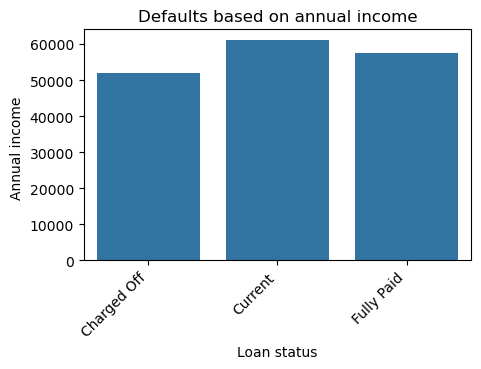

count     37874.000000
mean      61360.038960
std       28210.186388
min        4000.000000
25%       40000.000000
50%       56178.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [444]:
annual_income_data = df_no_outliers.groupby('loan_status')['annual_inc'].median().reset_index(name='avg_income')
plt.figure(figsize=(5, 3))
sns.barplot(x='loan_status', y='avg_income', data=annual_income_data)
plt.title('Defaults based on annual income')
plt.xlabel('Loan status')
plt.ylabel('Annual income ')
plt.xticks(rotation=45, ha='right')
plt.show()
df_no_outliers['annual_inc'].describe()